### Name - Parth Mehta
### Roll No - 101903297
### Group - 4CO12

## Declaration and Preprocessing

In [80]:
# Import Section
import random
import math
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [81]:
import warnings
warnings.filterwarnings("ignore")

In [82]:
# Read and print the excel file
df = pd.read_csv("C:/Users/Parth Mehta/OneDrive/Desktop/dataset road.csv")

In [83]:
# Print the dataset
df.head()

,Unnamed: 0,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,Para-9,Para-10,Para-11,Para-12,Para-13
0,Sec_1,1.0,324.0,354.5,17.0,0.0,3.0,117.0,2600.0,400.0,0.0,0.0,0.0,0.0,1.52
1,NaN,2.0,324.0,161.1,18.2,0.0,4.0,106.0,5950.0,1190.0,0.0,3.4,0.0,0.0,1.62
2,NaN,3.0,324.0,170.7,18.5,0.0,4.0,110.0,5950.0,1190.0,0.0,21.3,0.0,4.0,1.68
3,NaN,4.0,324.0,223.9,18.9,0.0,3.0,110.0,6150.0,1340.0,0.0,21.3,0.0,5.0,1.78
4,NaN,5.0,324.0,228.2,18.4,0.0,2.0,113.0,6340.0,1450.0,0.0,23.9,0.0,7.0,1.80


In [84]:
# Remove anomolies of sections
clear_idx = 910
lst_to_clear = []
for i in range(9):
  lst_to_clear.append(clear_idx+i)
lst_to_clear
df.fillna(0, inplace=True)
df.drop(lst_to_clear, inplace = True)

In [85]:
# Rename column to section_name
df.columns = df.columns.str.replace('Unnamed: 0', 'Section_name')

In [86]:
# Naming sections 
mul = 10
j = 0
for i in range(100):
  sec_name = df.iloc[j,0]
  df.iloc[j:j + mul, 0] = sec_name
  j += mul
test_frame = df.loc[df['year'] == 10]
df.head()

,Section_name,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,Para-9,Para-10,Para-11,Para-12,Para-13
0,Sec_1,1.0,324.0,354.5,17.0,0.0,3.0,117.0,2600.0,400.0,0.0,0.0,0.0,0.0,1.52
1,Sec_1,2.0,324.0,161.1,18.2,0.0,4.0,106.0,5950.0,1190.0,0.0,3.4,0.0,0.0,1.62
2,Sec_1,3.0,324.0,170.7,18.5,0.0,4.0,110.0,5950.0,1190.0,0.0,21.3,0.0,4.0,1.68
3,Sec_1,4.0,324.0,223.9,18.9,0.0,3.0,110.0,6150.0,1340.0,0.0,21.3,0.0,5.0,1.78
4,Sec_1,5.0,324.0,228.2,18.4,0.0,2.0,113.0,6340.0,1450.0,0.0,23.9,0.0,7.0,1.80


# Training and Testing
## Define the Model

In [87]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(bootstrap=False, criterion='mse',max_features='auto', max_leaf_nodes=95,min_samples_leaf=2,min_weight_fraction_leaf=0.1,oob_score=False, random_state=31, verbose=0,warm_start=False)

## Extract the test and training dataset for each section

In [88]:
# Extract the training part of input dataset
move = 9
def extract_xtrain(df, row_start, col_start):
  row_end = row_start + move
  return df.iloc[row_start:row_end, 1:10]

In [89]:
# Extract the training part of output dataset
def extract_ytrain(df, row_start, col_start):
  row_end = row_start + move
  return df.iloc[row_start:row_end, col_start]

In [90]:
# Extract the testing part of input dataset
def extract_xtest(df, row_start):
  row_end = row_start + move
  return df.iloc[row_end, 1:10].to_numpy()

In [91]:
# Extract the output part of ouput dataset
def extract_ytest(df, row_start, col_start):
  row_end = row_start + move
  return df.iloc[row_end, col_start]

In [92]:
# function to calcuate mean square error
def calcuate_lmse(predict_val, test_val):
  pred_diff = predict_val - test_val
  return (pred_diff)**2

In [93]:
# Get the XY Split
column_name = ["Para-"+str(i) for i in range(9,14)]
XY = []
def getXYsplit(df, row_start, row_end):
  XY = []
  XY.append(extract_xtrain(df, row_start, row_end))
  XY.append(extract_ytrain(df, row_start, row_end))
  XY.append(extract_xtest(df,row_start))
  XY.append(extract_ytest(df,row_start,row_end))
  return XY

In [94]:
from collections import defaultdict

In [95]:
# Create a dictionary for storing predicted and true values
pred_values = defaultdict(lambda : [])

In [96]:
from sklearn.metrics import mean_squared_error

In [97]:
target_col = [10,11,12,13,14]
root_mean_square_error = []
total_count = 0
curr_section = 0
total_squared_error = 0
max_val = 1000
for j in target_col:
  local_squared_error = 0
  l_count = 0
  LXY = [0,0,0,0]
  for i in range(0, max_val, 10):
    LXY = getXYsplit(df,i,j)
    x_train, y_train,x_test,y_test = LXY[0],LXY[1],LXY[2],LXY[3]

    # fit the model and predict
    model.fit(x_train, y_train)
    ypred = model.predict(x_test.reshape(1,-1))[0]

    # store the predicted values
    pred_values[column_name[curr_section]].append(ypred)
    
    # store squared difference for RMSE

    # local_squared_error = calcuate_lmse(ypred, y_test) + local_squared_error
    total_squared_error = calcuate_lmse(ypred, y_test) + total_squared_error
    l_count += 1
    total_count += 1

  # root_mean_square_error.append(local_squared_error)
  curr_section += 1
predicted_df = pd.DataFrame.from_dict(pred_values)

In [98]:
# Calculate  RMSE
total_rmse_by_n = total_squared_error/total_count
final_rmse = total_rmse_by_n**0.5

print("The RMSE is " + str(final_rmse))

The RMSE is 42.5793845247142


# Plot

In [99]:
df

,Section_name,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,Para-9,Para-10,Para-11,Para-12,Para-13
0,Sec_1,1.0,324.0,354.5,17.0,0.0,3.0,117.0,2600.0,400.0,0.0,0.0,0.0,0.0,1.520
1,Sec_1,2.0,324.0,161.1,18.2,0.0,4.0,106.0,5950.0,1190.0,0.0,3.4,0.0,0.0,1.620
2,Sec_1,3.0,324.0,170.7,18.5,0.0,4.0,110.0,5950.0,1190.0,0.0,21.3,0.0,4.0,1.680
3,Sec_1,4.0,324.0,223.9,18.9,0.0,3.0,110.0,6150.0,1340.0,0.0,21.3,0.0,5.0,1.780
4,Sec_1,5.0,324.0,228.2,18.4,0.0,2.0,113.0,6340.0,1450.0,0.0,23.9,0.0,7.0,1.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,Sec_101,6.0,454.0,931.8,13.6,125.0,13.0,116.0,4150.0,830.0,15.1,1.8,1.0,15.0,1.681
1005,Sec_101,7.0,454.0,703.0,14.5,17.0,13.0,118.0,4150.0,830.0,24.6,7.9,2.0,15.0,1.838
1006,Sec_101,8.0,454.0,1124.1,14.9,45.0,18.0,117.0,4200.0,840.0,119.0,15.7,2.0,16.0,1.862
1007,Sec_101,9.0,454.0,1462.3,13.2,62.0,27.0,117.0,4400.0,720.0,138.2,30.5,6.0,18.0,1.883


In [100]:
# Get random rows for plotting
plot_row = 40

random_rows = []
for i in range(plot_row):
  random_rows.append(random.randint(0,90))


## Plot for Para-9

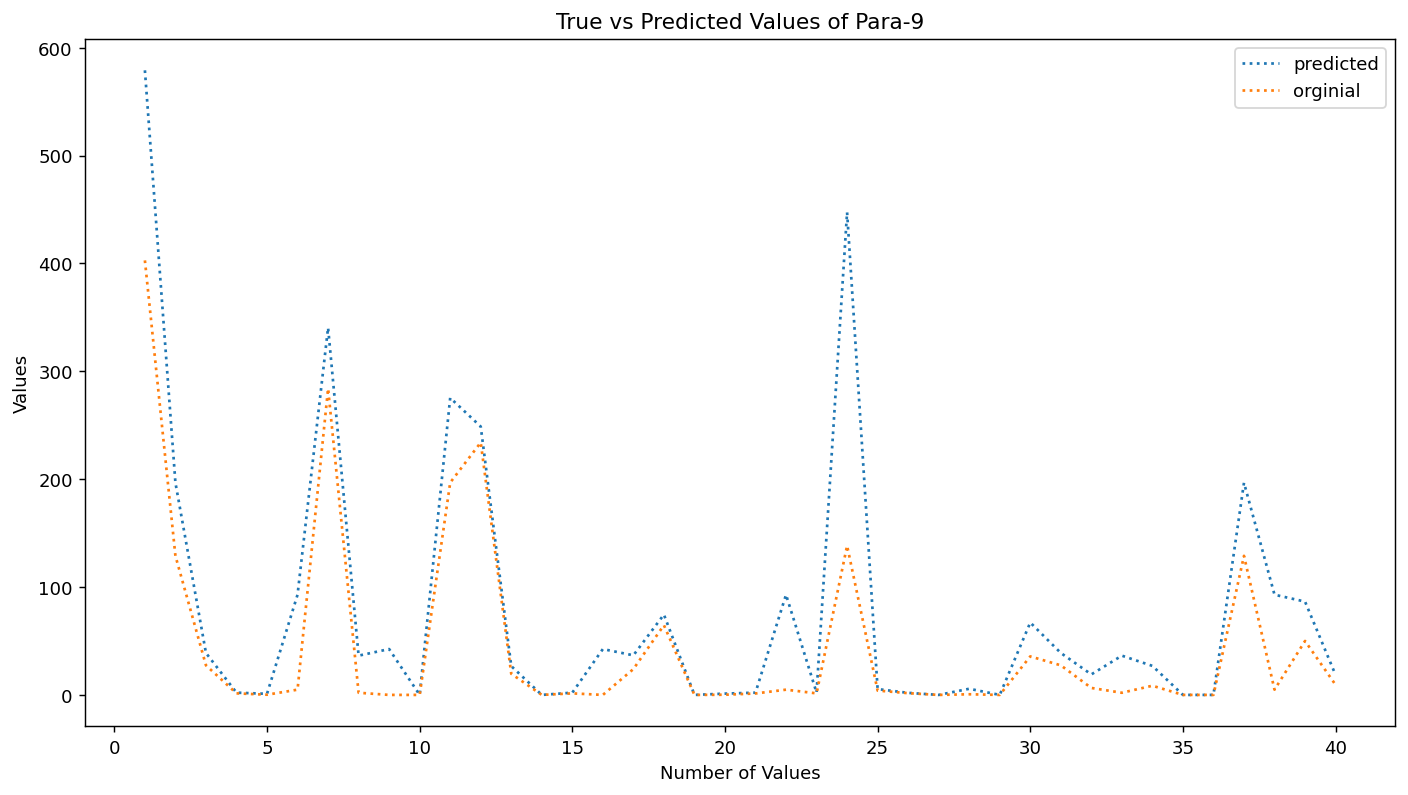

In [101]:
figure(figsize=(13, 7), dpi=130)
true_value = predicted_df.iloc[random_rows, 0]
predicted_value = test_frame.iloc[random_rows,10]
x_value = []
for i in range(len(true_value)):
  x_value.append(i+1)
plt.plot(x_value,predicted_value, linestyle = 'dotted', label = 'predicted')
plt.plot(x_value,true_value, linestyle = 'dotted', label = 'orginial')
plt.xlabel('Number of Values')
plt.ylabel('Values')
plt.title('True vs Predicted Values of Para-9')
plt.legend(loc = 'upper right')

## Plot for Para-10

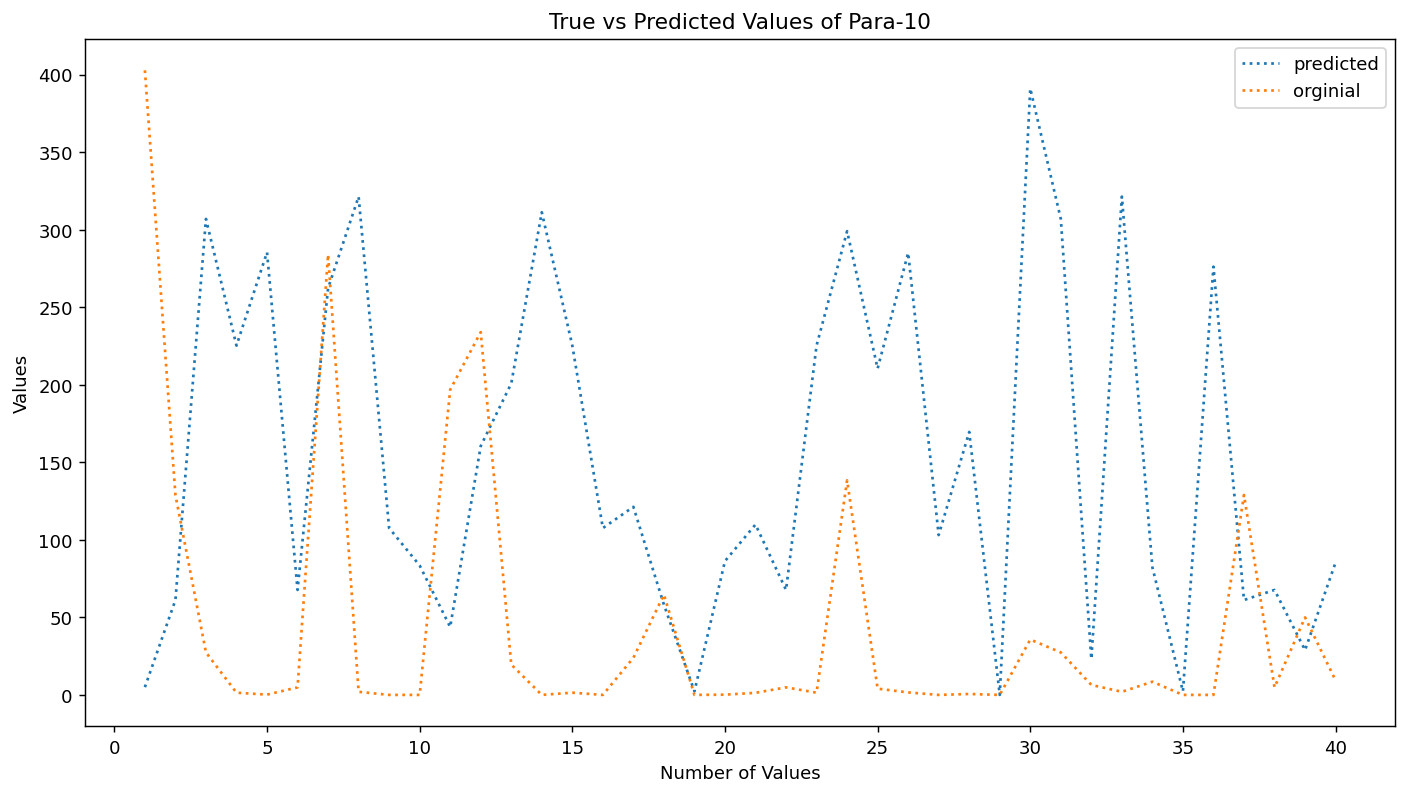

In [102]:
figure(figsize=(13, 7), dpi=130)
true_value = predicted_df.iloc[random_rows, 0]
predicted_value = test_frame.iloc[random_rows,11]
x_value = []
for i in range(len(true_value)):
  x_value.append(i+1)
plt.plot(x_value,predicted_value, linestyle = 'dotted', label = 'predicted')
plt.plot(x_value,true_value, linestyle = 'dotted', label = 'orginial')
plt.xlabel('Number of Values')
plt.ylabel('Values')
plt.title('True vs Predicted Values of Para-10')
plt.legend(loc = 'upper right')

## Plot for Para-11

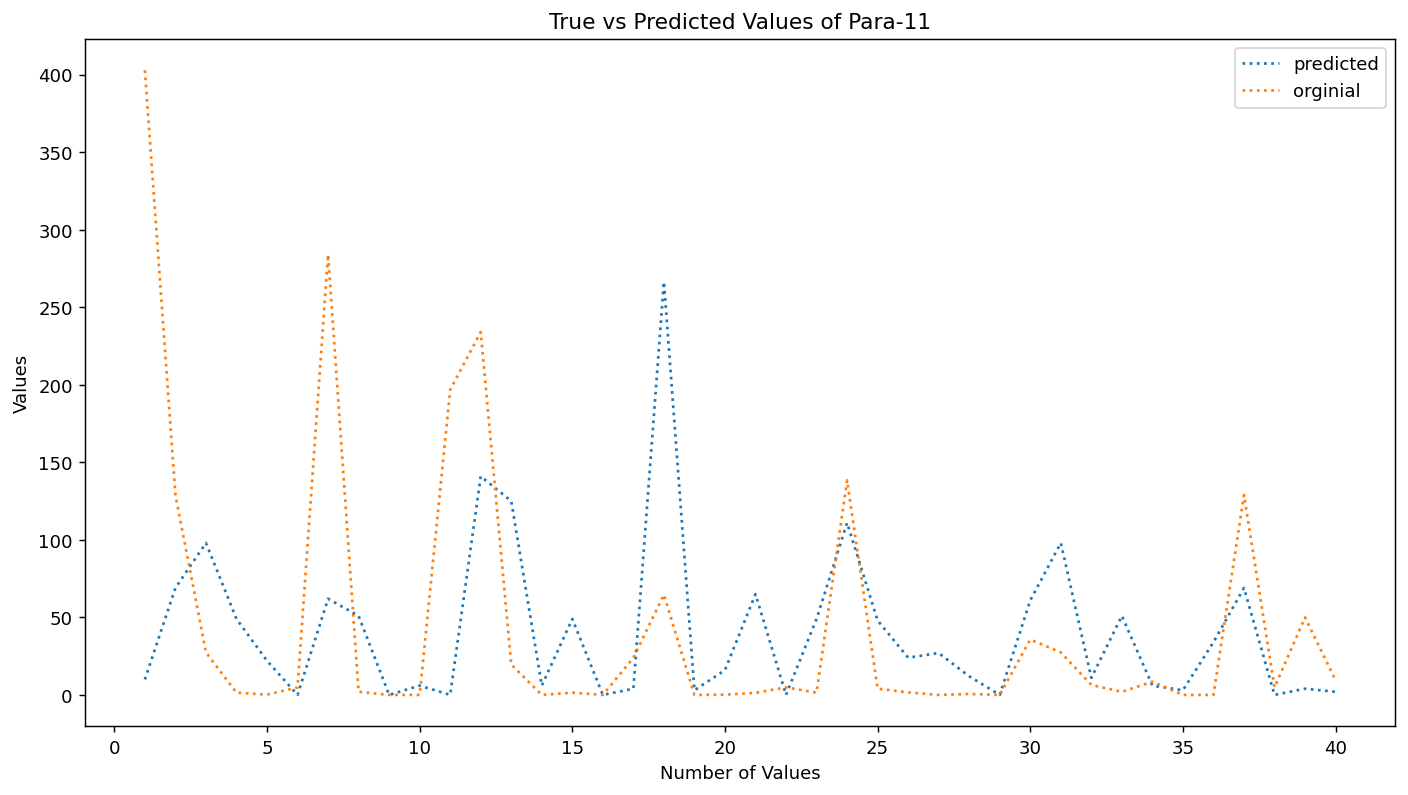

In [103]:
figure(figsize=(13, 7), dpi=130)
true_value = predicted_df.iloc[random_rows, 0]
predicted_value = test_frame.iloc[random_rows,12]
x_value = []
for i in range(len(true_value)):
  x_value.append(i+1)
plt.plot(x_value,predicted_value, linestyle = 'dotted', label = 'predicted')
plt.plot(x_value,true_value, linestyle = 'dotted', label = 'orginial')
plt.xlabel('Number of Values')
plt.ylabel('Values')
plt.title('True vs Predicted Values of Para-11')
plt.legend(loc = 'upper right')

## Plot for Para-12

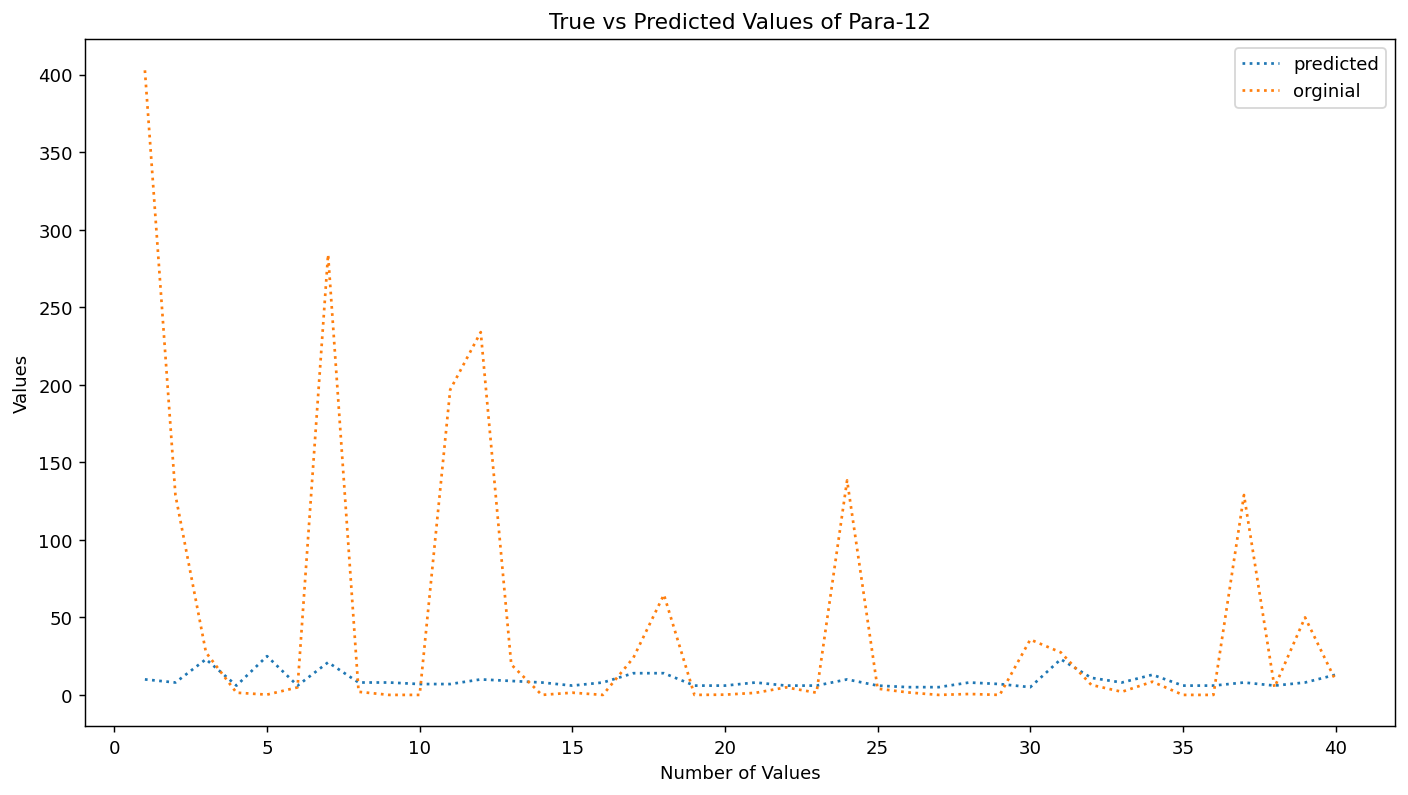

In [104]:
figure(figsize=(13, 7), dpi=130)
true_value = predicted_df.iloc[random_rows, 0]
predicted_value = test_frame.iloc[random_rows,13]
x_value = []
for i in range(len(true_value)):
  x_value.append(i+1)
plt.plot(x_value,predicted_value, linestyle = 'dotted', label = 'predicted')
plt.plot(x_value,true_value, linestyle = 'dotted', label = 'orginial')
plt.xlabel('Number of Values')
plt.ylabel('Values')
plt.title('True vs Predicted Values of Para-12')
plt.legend(loc = 'upper right')

## Plot for Para-13

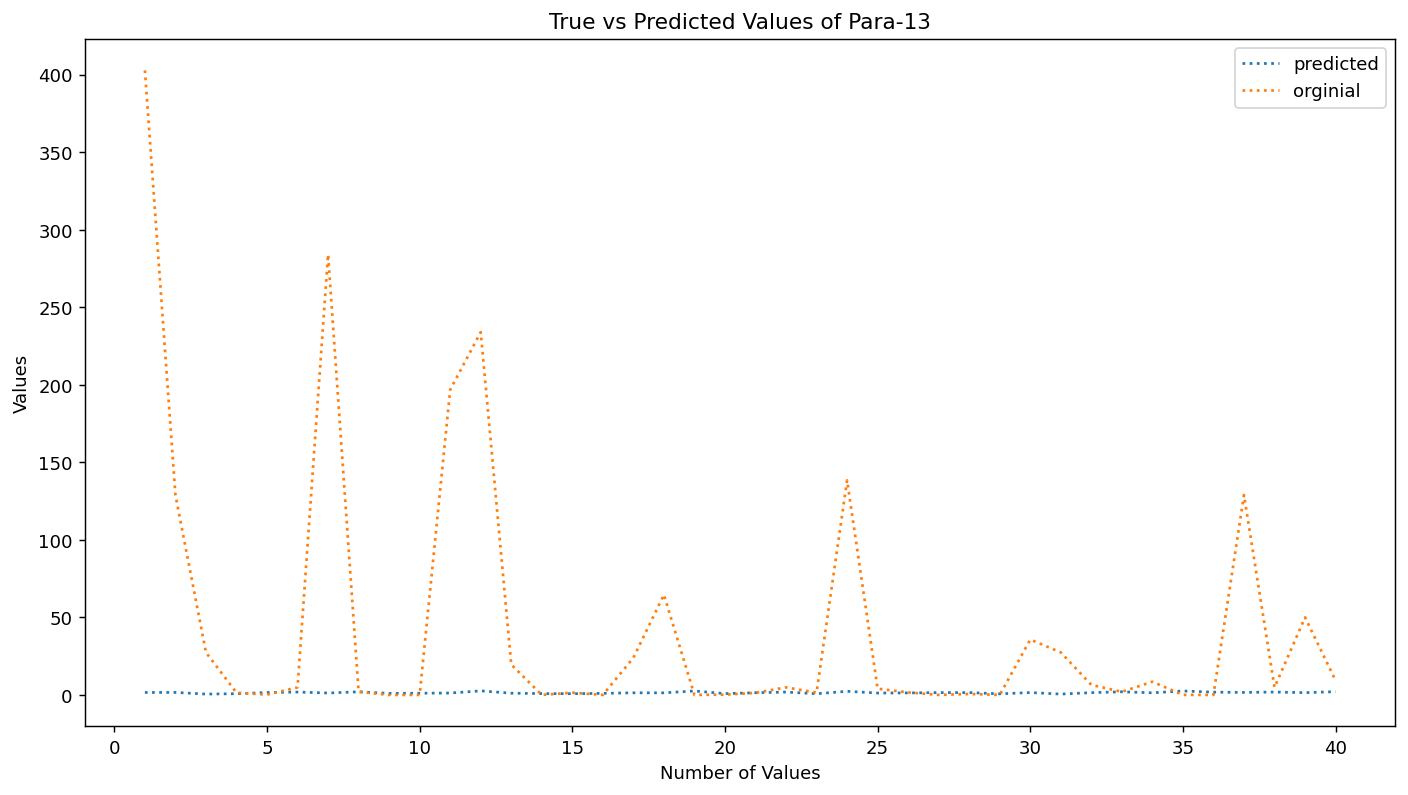

In [105]:
figure(figsize=(13, 7), dpi=130)
true_value = predicted_df.iloc[random_rows, 0]
predicted_value = test_frame.iloc[random_rows,14]
x_value = []
for i in range(len(true_value)):
  x_value.append(i+1)
plt.plot(x_value,predicted_value, linestyle = 'dotted', label = 'predicted')
plt.plot(x_value,true_value, linestyle = 'dotted', label = 'orginial')
plt.xlabel('Number of Values')
plt.ylabel('Values')
plt.title('True vs Predicted Values of Para-13')
plt.legend(loc = 'upper right')